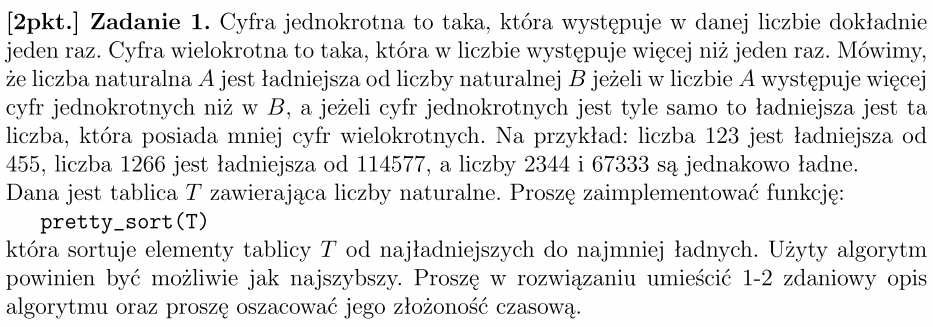

# I Sposób

### Omówienie algorytmu

##### Wstępne rozważania

Ponieważ mamy posortować liczby według tego, która z nich jest ładniejsza, konieczne jest najpierw wymyślenie klucza, po którym będzie odbywało się sortowanie. Oczywiście można wykorzystać jakiś z algorytmów sortowania o złożoności $ O(n \cdot log(n)) $ i użyć funkcji, która by porównywała dwie liczby i zwracała informację, która z nich jest ładniejsza, a na podstawie rezultatu, liczby umieszczane byłyby w odpowiedniej kolejności. Nie jest to jednak najszybsze możliwe rozwiązanie, a o najszybsze chodzi w tym zadaniu. Od razu na myśl przychodzą algorytmy sortowania o złożoności liniowej. Wiemy, że są to liczby naturalne, więc z powodzeniem można skorzystać z takiego algorytmu, tylko który dokładnie wybrać? Bucket Sort odpada, ponieważ nie wiemy nic o rozkładzie liczb. Najlepszy okazuje się Counting Sort, ale musimy odpowiednio przygotować te liczby do sortowania, a algorytm odpowiednio zmodyfikować.

##### Przygotowanie liczb do sortowania

Po przeczytaniu polecenia jeszcze raz, możemy zauważyć, że mamy podany dokładny "przepis" na to, jak mają być sortowane liczby: <br>
- liczba naturalna $ A $ jest ładniejsza od $ B $, jeżeli ma więcej cyfr jednokrotnych, <br>
- jeżeli liczby $ A $ i $ B $ mają tyle samo cyfr jednokrotnych, ładniejsza jest ta, która ma mniej cyfr wielokrotnych, <br>
- jeżeli liczby cyfr jednokrotnych i wielokrotnych w obu liczbach są równe, liczby są jednakowo ładne. <br>

Można wyciągnąć wniosek, że największe znaczenie ma liczba cyfr jednokrotnych, później jest liczba cyfr wielokrotnych. Warto więc podzielić liczby tak, by najpierw były sortowane po mniej znaczącej wartości (niemalejąco, bo im większa, tym liczba brzydsza), a więc po liczbie cyfr wielokrotnych, a następnie po bardziej znaczącej liczbie cyfr jednokrotnych (nierosnąco, bo im większa, tym liczba ładniejsza). Musimy więc napisać funkcję, która zwróci nam obie te wartości, a następnie, aby za każdym razem nie zliczać na nowo tych wartości, zapisać np. w postaci 3-elementowej krotki tę liczbę, jej liczbę cyfr jednokrotnych i liczbę cyfr wielokrotnych.

##### Ostatni krok

Po posortowaniu liczb (zgodnie z powyższymi zasadami), musimy przejść liniowo po tablicy z posortowanymi liczbami i podmienić krotki, które reprezentują te liczby, na te liczby.

### Oszacowanie złożoności

- $ O(2 \cdot (n + 11)) = O(n) $ - złożoność sortowania Radix sortem ($ 2 $ - bo mamy tyle "kolumn", po których sortujemy wartości, $ n $ - bo tyle jest liczb, $ 11 $ - bo maksymalna liczba (różnych) cyfr jednokrotnych/wielokrotnych wynosi 10, ale może być również 0 - korzystamy z Counting Sorta wewnątrz Radix Sorta, więc tworzymy tablicę o rozmiarze równym 11), <br>
- $ O(n \cdot (d + 10)) = O(n \cdot d) $ - złożoność zliczania cyfr jednokrotnych i wielokrotnych ($ n $ - bo mamy tyle liczb, $ d $ - oznacza liczbę cyfr największej z liczb, $ 10 $ - bo w 10-elementowej tablicy będziemy zliczać cyfry tej liczby) <br>
- I kilka razy $ O(n) $ na przepisywanie wartości i zamianę z powrotem krotek na liczby. <br>

RAZEM: $ O(n \cdot d) $

### Implementacja algorytmu

In [1]:
def pretty_sort(arr):
    # If an array has no more than one element, do not sort
    if len(arr) < 2: return
    # Map numbers array to an array of prettiness tuples
    for i in range(len(arr)):
        arr[i] = prettify(arr[i])
    # Sort numbers by their prettiness (by a number of multiple
    # digits first and then by a number of single digits)
    counting_sort(arr, lambda tup: tup[2], rewrite_left_to_right)
    counting_sort(arr, lambda tup: tup[1], rewrite_right_to_left)
    # Restore the original numbers and place them in an array
    # on appropriate positions
    for i in range(len(arr)):
        arr[i] = arr[i][0]

        
def rewrite_left_to_right(temp, arr):
    for i in range(len(temp)):
        arr[i] = temp[i]
        
        
def rewrite_right_to_left(temp, arr):
    for i in range(len(temp)):
        arr[i] = temp[len(temp)-i-1]
        
    
def prettify(num) -> ('num', 'single digits count', 'multiple digits count'):
    counts = [0] * 10
    num_cp = num
    while num:
        num, digit = divmod(num, 10)
        counts[digit] += 1
    # Count a number of singla and multiple digits
    single_count = multiple_count = 0
    for count in counts:
        if count > 1:
            multiple_count += 1
        elif count == 1:
            single_count += 1
    # Return a result tuple
    return num_cp, single_count, multiple_count
    
    
def counting_sort(arr, key, rewrite_values):
    # Allocate memory for required temporary arrays
    counts = [0] * 11
    temp = [None] * len(arr)
    # Count values repetitions
    for val in arr:
        counts[key(val)] += 1
    # Modify the counts array to indicate how many values are not greater than the current one
    for i in range(1, len(counts)):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        idx = key(arr[i])
        counts[idx] -= 1
        temp[counts[idx]] = arr[i]
    # Rewrite sorted values to the initial array
    rewrite_values(temp, arr)

###### Kilka testów

In [2]:
import random

random.seed(0)

arr = [random.randint(0, 1_000_000) for _ in range(random.randint(0, 25))]
print('Input arr:', arr, sep='\n', end='\n\n')
pretty_sort(arr)
print('Result:', arr, sep='\n', end='\n\n')

for num in arr:
    print(prettify(num))

Input arr:
[794772, 933488, 441001, 42450, 271493, 536110, 509532, 424604, 962838, 821872, 870163, 318046]

Result:
[318046, 870163, 271493, 962838, 509532, 536110, 424604, 42450, 794772, 821872, 933488, 441001]

(318046, 6, 0)
(870163, 6, 0)
(271493, 6, 0)
(962838, 4, 1)
(509532, 4, 1)
(536110, 4, 1)
(424604, 3, 1)
(42450, 3, 1)
(794772, 3, 1)
(821872, 2, 2)
(933488, 2, 2)
(441001, 0, 3)


# II Sposób (lepszy)

### Omówienie algorytmu

Możemy wykorzystać taki trick, że każdą z liczb przekształcimy na inną liczbę, która będzie zależała od liczby cyfr jednokrotnych i liczby cyfr wielokrotnych, zgodnie z poniższym wzorem:

    pretty_num = (10 - single_count) * 100 + multiple_count

gdzie 'pretty_num' będzie liczbą, po której będziemy sortować liczby z tablicy wejściowej, 'single_count' to liczba pojedynczych cyfr, a 'multiple_count' to liczba cyfr wielokrotnych. Wzór ma taką postać, ponieważ obie wartości ('single_count' oraz 'multiple_count') są z przedziału $ \{0, 1, 2, ..., 9, 10\} $, więc aby jedna nie nachodziła na drugą, musimy pierwszą z nich (bardziej znaczącą) umieścić z przodu liczby wynikowej, a więc przesunąć o 2 miejsca w lewo, robiąc miejsce dla pozostałej, maksymalnie 2-cyfrowej liczby. Nie używamy po prostu 'single_count', ponieważ chcemy, że by najpierw były liczby najładniejsze, czyli te, dla których 'single_count' ma wartość największą. Ponieważ Counting Sort z reguły sotuje liczby w kolejności niemalejącej, musimy spowodować, aby liczby najładniejsze, zmapowane do 'pretty_num' miały najmniejszą wartość. Oczywiście do liczby dodajemy 'multiple_count' już normalnie, bo im większa wartość, tym liczba jest brzydsza, a więc będzie dalej.

### Implementacja algorytmu

In [3]:
def pretty_sort(arr):
    # If an array has no more than one element, do not sort
    if len(arr) < 2: return
    # Map numbers array to an array of prettiness tuples
    for i in range(len(arr)):
        arr[i] = prettify(arr[i])
    # Sort numbers by their prettiness
    counting_sort(arr, lambda tup: tup[1])
    # Restore the original numbers and place them in an array
    # on appropriate positions
    for i in range(len(arr)):
        arr[i] = arr[i][0]

    
def prettify(num) -> ('num', 'pretty_num'):
    counts = [0] * 10
    num_cp = num
    while num:
        num, digit = divmod(num, 10)
        counts[digit] += 1
    # Count a number of singla and multiple digits
    single_count = multiple_count = 0
    for count in counts:
        if count > 1:
            multiple_count += 1
        elif count == 1:
            single_count += 1
    # Return a result tuple
    return num_cp, (10 - single_count) * 100 + multiple_count
    
    
def counting_sort(arr, key):
    # Allocate memory for required temporary arrays
    counts = [0] * 1011  # Max possible value is 10 * 100 + 10 = 1010 and min is 0
    temp = [None] * len(arr)
    # Count values repetitions
    for val in arr:
        counts[key(val)] += 1
    # Modify the counts array to indicate how many values are not greater than the current one
    for i in range(1, len(counts)):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        idx = key(arr[i])
        counts[idx] -= 1
        temp[counts[idx]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(temp)):
        arr[i] = temp[i]

###### Kilka testów

In [4]:
import random

random.seed(0)

arr = [random.randint(0, 1_000_000) for _ in range(random.randint(0, 25))]
print('Input arr:', arr, sep='\n', end='\n\n')
pretty_sort(arr)
print('Result:', arr, sep='\n', end='\n\n')

for num in arr:
    print(prettify(num))

Input arr:
[794772, 933488, 441001, 42450, 271493, 536110, 509532, 424604, 962838, 821872, 870163, 318046]

Result:
[271493, 870163, 318046, 536110, 509532, 962838, 794772, 42450, 424604, 933488, 821872, 441001]

(271493, 400)
(870163, 400)
(318046, 400)
(536110, 601)
(509532, 601)
(962838, 601)
(794772, 701)
(42450, 701)
(424604, 701)
(933488, 802)
(821872, 802)
(441001, 1003)
